# Tutorial 1 - Bank decision loan problem with crisp inputs

In this tutorial a fuzzy inference system for loan approbation is builded. The problem has three input variables: score, ratio, and credit; and one output variable: decision.

In [1]:
import os

os.chdir('/workspaces/fuzzy-expert')

In [2]:
import warnings

warnings.filterwarnings("ignore")

## Variable specification

In the following code, a dictionary containing the variables of the problem is defined. The keys of the dictionary are the names of the variables in the rules. For each variable is defined the limits of the universe of discourse, the terms, and the membership function for each term. Finally, the variable `score` is ploted.

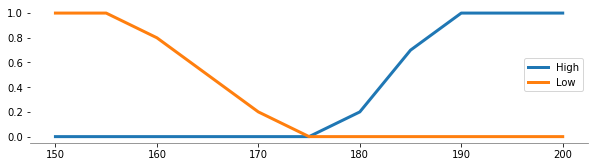

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from fuzzy_expert.variable import FuzzyVariable

variables = {
    "score": FuzzyVariable(
        universe_range=(150, 200),
        terms={
            "High": [(175, 0), (180, 0.2), (185, 0.7), (190, 1)],
            "Low": [(155, 1), (160, 0.8), (165, 0.5), (170, 0.2), (175, 0)],
        },
    ),
    "ratio": FuzzyVariable(
        universe_range=(0.1, 1),
        terms={
            "Goodr": [(0.3, 1), (0.4, 0.7), (0.41, 0.3), (0.42, 0)],
            "Badr": [(0.44, 0), (0.45, 0.3), (0.5, 0.7), (0.7, 1)],
        },
    ),
    #
    "credit": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Goodc": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
            "Badc": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
        },
    ),
    #
    "decision": FuzzyVariable(
        universe_range=(0, 10),
        terms={
            "Approve": [(5, 0), (6, 0.3), (7, 0.7), (8, 1)],
            "Reject": [(2, 1), (3, 0.7), (4, 0.3), (5, 0)],
        },
    ),
}

plt.figure(figsize=(10, 2.5))
variables["score"].plot()

## Rule specification



The fuzzy inference system has two rules. They are directly stored in a list.

In [4]:
from fuzzy_expert.rule import FuzzyRule

rules = [
    FuzzyRule(
        premise=[
            ("score", "High"),
            ("AND", "ratio", "Goodr"),
            ("AND", "credit", "Goodc"),
        ],
        consequence=[("decision", "Approve")],
    ),
    FuzzyRule(
        premise=[
            ("score", "Low"),
            ("AND", "ratio", "Badr"),
            ("OR", "credit", "Badc"),
        ],
        consequence=[("decision", "Reject")],
    )
]

print(rules[0])
print()
print(rules[1])

IF  score IS High
    AND ratio IS Goodr
    AND credit IS Goodc
THEN
    decision IS Approve
CF = 1.00
Threshold-CF = 0.00


IF  score IS Low
    AND ratio IS Badr
    OR credit IS Badc
THEN
    decision IS Reject
CF = 1.00
Threshold-CF = 0.00



## Inference system specification and computations

Finally, the fuzzy inference system is specified. The model is used to evaluate the following crisp values for the input variables: `score=190`, `ratio=0.39`, and `credit=1.5`.  The model returns a dictionary with the values of the variables in the consequence of the rules and the certainty factor of the conclusion.

In [5]:
from fuzzy_expert.inference import DecompositionalInference

model = DecompositionalInference(
    and_operator="min",
    or_operator="max",
    implication_operator="Rc",
    composition_operator="max-min",
    production_link="max",
    defuzzification_operator="cog",
)

model(
    variables=variables,
    rules=rules,
    score=190,
    ratio=0.39,
    credit=1.5,
)

({'decision': 8.010492631084489}, 1.0)

## Visualization of the results

The function plot can be used to obtain a graphical represntation of the results of the inference systems. It uses the same parameters used to the evaluation of the system.


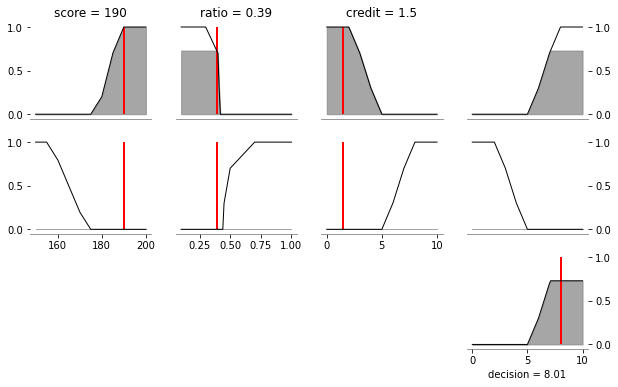

In [6]:
plt.figure(figsize=(10, 6))
model.plot(
    variables=variables,
    rules=rules,
    score=190,
    ratio=0.39,
    credit=1.5,
)

## User interaction

Using the `ipywidgets` package in Jupyter Lab it is possible to obtain an interactive user interface for the user. The funtion `demo` is used to plot the results; following, the function `interact` is used to create the user interface.

In [7]:
from ipywidgets import interact, widgets

def demo(score, ratio, credit):
    plt.figure(figsize=(10,6))    
    model.plot(
        variables=variables,
        rules=rules,
        score=score,
        ratio=ratio,
        credit=credit,
    )

interact(
    demo, 
    score=widgets.FloatSlider(min=150, max=200),
    ratio=widgets.FloatSlider(min=0.1, max=1),
    credit=widgets.FloatSlider(min=0, max=10),
)

interactive(children=(FloatSlider(value=150.0, description='score', max=200.0, min=150.0), FloatSlider(value=0…

<function __main__.demo(score, ratio, credit)>

![inter](interact.png)